# **Model Training and Evaluation for Problem 1**

In this file, after the preprocessing steps done in **PPQ1** and data preparation, the focus shifted to training models and finding the best model for the first problem.
**Problem 2**: Suppose we want to predict the number of passengers using only the data recorded for the same time period (excluding year and number of trains), without looking at the number of passengers from previous days. The model would be used to predict the number of passengers, and based on that, the required number of trains would be forecasted.
In the end, the best models were found based on **RMSE** and **R²** metrics.


The workflow is as follows: The models were trained, and the results for each model were stored.
The models used were:
1. **Linear Regression**
2. **Ridge**
3. **Lasso**
4. **ElasticNet**
5. **Random Forest Regressor**
6. **Decision Tree Regressor**
7. **KNN**
8. **SVR**
9. **XGBoost**
10. **LightGBM**
11. **ANN**


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, PredefinedSplit
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint


In [4]:
X_train = pd.read_csv('data\Q1\X_train.csv')
X_val = pd.read_csv('data\Q1\X_val.csv')
X_test = pd.read_csv('data\Q1\X_test.csv')
y_train = pd.read_csv('data\Q1\y_train.csv').values.ravel()
y_val = pd.read_csv('data\Q1\y_val.csv').values.ravel()
y_test = pd.read_csv('data\Q1\y_test.csv').values.ravel()
y_test = np.round(np.expm1(y_test))

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(46516, 80) (8192, 80) (9658, 80)
(46516,) (8192,) (9658,)


## Models Training

### LinearRegression

In [4]:
model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False]
}
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error')
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\LinearRegression.joblib')

Best parameters: {'fit_intercept': False}


['models_Q1\\LinearRegression.joblib']

### Ridge

In [5]:
model = Ridge()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 200, 500, 1000, 5000, 10000],
    'fit_intercept': [True, False]
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error')
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\Ridge.joblib')

Best parameters: {'alpha': 1000, 'fit_intercept': False}


['models_Q1\\Ridge.joblib']

### Lasso

In [6]:
model = Lasso(max_iter=5000)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=4)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\Lasso.joblib')

Best parameters: {'alpha': 0.01}


['models_Q1\\Lasso.joblib']

### ElasticNet

In [7]:
model = ElasticNet()
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0,6 ,0.7, 0.8, 0.9]
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=4)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\ElasticNet.joblib')

Best parameters: {'alpha': 0.1, 'l1_ratio': 0}


['models_Q1\\ElasticNet.joblib']

### RandomForestRegressor

In [8]:
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300]
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=4)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\RandomForestRegressor.joblib')

Best parameters: {'n_estimators': 300}


['models_Q1\\RandomForestRegressor.joblib']

### DecisionTreeRegressor

In [9]:
model = DecisionTreeRegressor()
param_grid = {
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error')
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\DecisionTreeRegressor.joblib')

Best parameters: {}


['models_Q1\\DecisionTreeRegressor.joblib']

### KNN

In [10]:
model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': np.arange(50), 
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski'],
    'p': [1, 2],
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=4, verbose=3)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\KNN.joblib')

Fitting 1 folds for each of 200 candidates, totalling 200 fits
Best parameters: {'metric': 'minkowski', 'n_neighbors': 27, 'p': 2, 'weights': 'uniform'}


['models_Q1\\KNN.joblib']

### SVR

In [5]:
model = SVR()
param_grid = {
    'C': [1, 2, 5],
    'epsilon': [0.1, 0.3, 0.5, 0.7],
    'kernel': ['rbf']
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=8, verbose=2)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\SVR.joblib')

Fitting 1 folds for each of 12 candidates, totalling 12 fits
Best parameters: {'C': 1, 'epsilon': 0.7, 'kernel': 'rbf'}


['models_Q1\\SVR.joblib']

### XGBoost

In [11]:
model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', tree_method= 'gpu_hist')
param_grid = {
    'n_estimators': [100, 200, 500, 700],
    'learning_rate': [0.005, 0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'gamma': [0, 0.2]
    }
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=4)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\XGBoost.joblib')

Best parameters: {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 100}


['models_Q1\\XGBoost.joblib']

### LightGBM

In [12]:
model = lgb.LGBMRegressor(num_threads= 8, verbose=-1)
param_grid = {
    'num_leaves': [31, 63, 127, 255],
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'n_estimators': [100, 200, 500], 
}
X_combined = np.concatenate([X_train, X_val])
y_combined = np.concatenate([y_train, y_val])
train_indices = np.arange(len(X_train))
val_indices = np.arange(len(X_train), len(X_train) + len(X_val))
cv_split = [(train_indices, val_indices)]
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv_split, scoring='neg_mean_squared_error', n_jobs=1)
grid_search.fit(X_combined, y_combined)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, 'models_Q1\LightGBM.joblib')

Best parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 255}


['models_Q1\\LightGBM.joblib']

### ANN

In [207]:
model = Sequential([
    Dense(32, activation='tanh', input_shape=(X_train.shape[1],)), 
    Dropout(0.2),
    Dense(16, activation='linear'),
    Dropout(0.2),
    Dense(8, activation='linear'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='relu'),
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

checkpoint = ModelCheckpoint(
    filepath='models_Q1/ANN_model.keras',
    monitor='val_loss',                        
    save_best_only=True,                        
    save_weights_only=False,                    
    mode='min',                              
    verbose=0                                  
)

history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[checkpoint],
                    verbose=1,
                    )


Epoch 1/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 6.4034 - val_loss: 1.1416
Epoch 2/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.4952 - val_loss: 1.0943
Epoch 3/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.2174 - val_loss: 1.0317
Epoch 4/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.9347 - val_loss: 0.8500
Epoch 5/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.8105 - val_loss: 0.8964
Epoch 6/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7457 - val_loss: 1.0318
Epoch 7/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.7013 - val_loss: 0.9616
Epoch 8/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6695 - val_loss: 1.0206
Epoch 9/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6488 - val_loss: 0.9619
Epoch 10/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6278 - val_loss: 0.8753
Epoch 11/50
1454/1454 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6226 - val_loss: 1.0893
Epoch 12/50
1454/1454 ━━━━━━━━

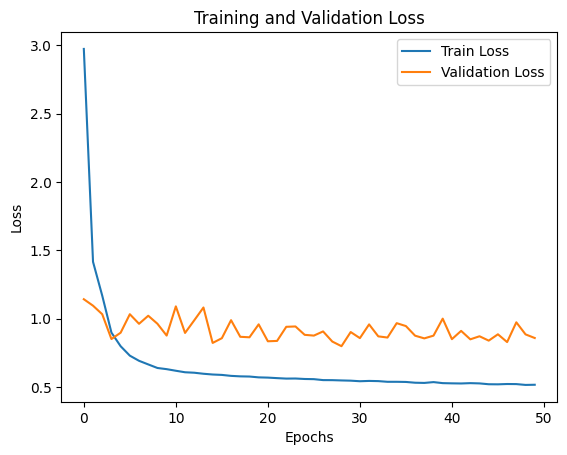

In [208]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



## Models Testing

### pre test

In [6]:
y_test.max()

15544.0

In [7]:
rmse_results = {}
r2_results = {}

In [8]:
def sns_jointplot(y_pred, y_test):
  g = sns.jointplot(x=y_pred, y=y_test, kind='scatter')
  plt.xlabel('y_pred')
  plt.ylabel('y_label')
  if np.all(y_pred >= 0):
    g.ax_joint.set_xlim(0-1000, y_test.max()+1000)
  g.ax_joint.set_ylim(0-1000, y_test.max()+1000)
  plt.show()

### LinearRegression

RMSE: 1148.8162439091907
R^2: 0.37731919241255785


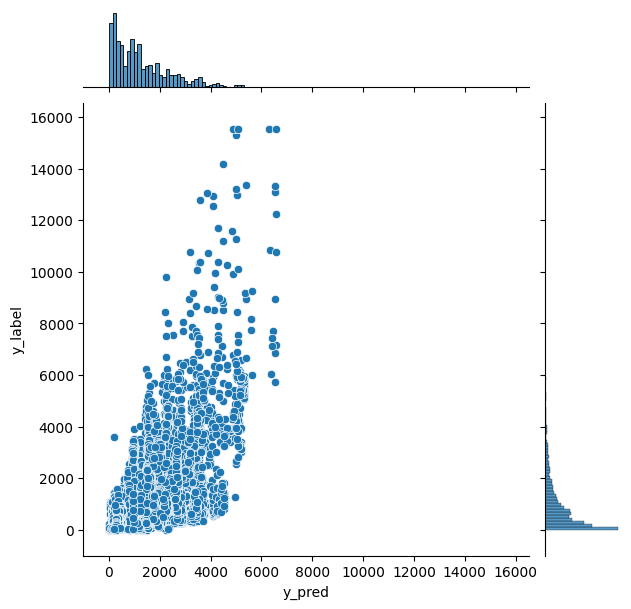

In [9]:
model_LinearRegression = joblib.load('models_Q1\LinearRegression.joblib') 


y_pred = model_LinearRegression.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['LinearRegression'] = rmse
r2_results['LinearRegression'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### Ridge

RMSE: 1300.612004261261
R^2: 0.20189531400256988


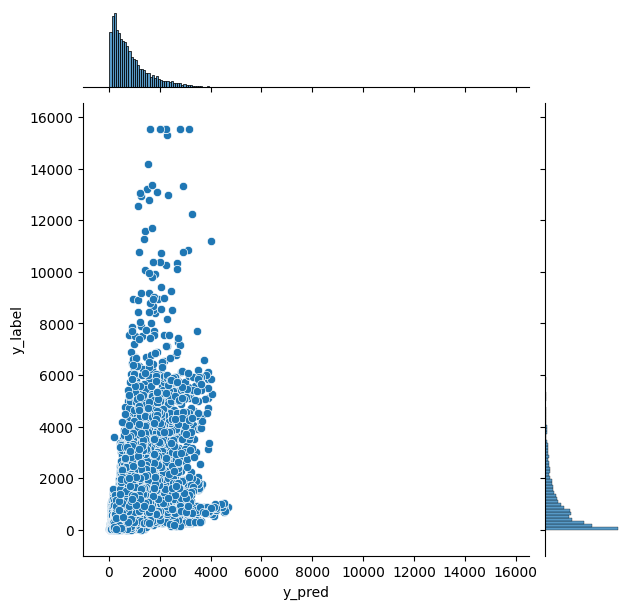

In [10]:
model_Ridge = joblib.load('models_Q1\Ridge.joblib') 


y_pred = model_Ridge.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['Ridge'] = rmse
r2_results['Ridge'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### Lasso

RMSE: 1195.8434763814794
R^2: 0.32529640854614783


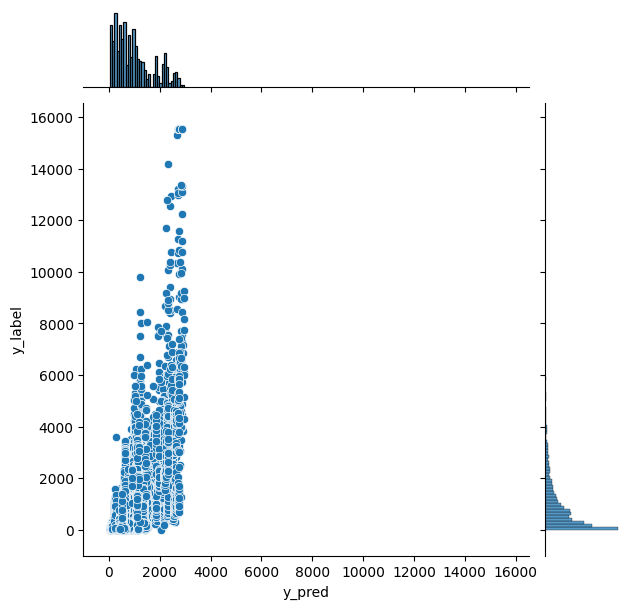

In [11]:
model_Lasso = joblib.load('models_Q1\Lasso.joblib') 

y_pred = model_Lasso.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['Lasso'] = rmse
r2_results['Lasso'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### ElasticNet

RMSE: 1348.7679711760686
R^2: 0.1417005520334752


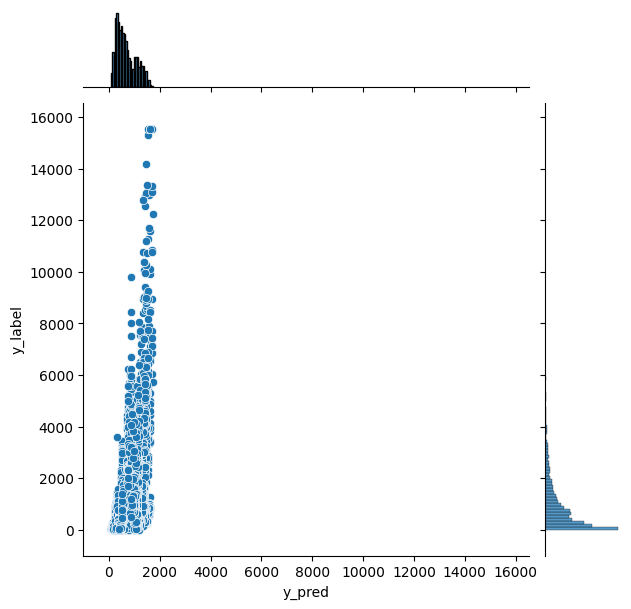

In [12]:
model_ElasticNet = joblib.load('models_Q1\ElasticNet.joblib') 


y_pred = model_ElasticNet.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['ElasticNet'] = rmse
r2_results['ElasticNet'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### RandomForestRegressor

RMSE: 2192.821380918797
R^2: -1.2686675479453675


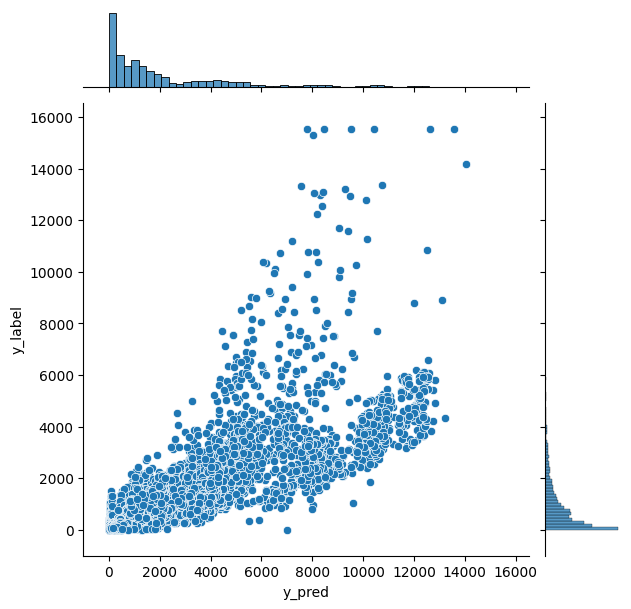

In [13]:
model_RandomForestRegressor = joblib.load('models_Q1\RandomForestRegressor.joblib') 


y_pred = model_RandomForestRegressor.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['RandomForestRegressor'] = rmse
r2_results['RandomForestRegressor'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### DecisionTreeRegressor

RMSE: 2359.13788989912
R^2: -1.6258565451859583


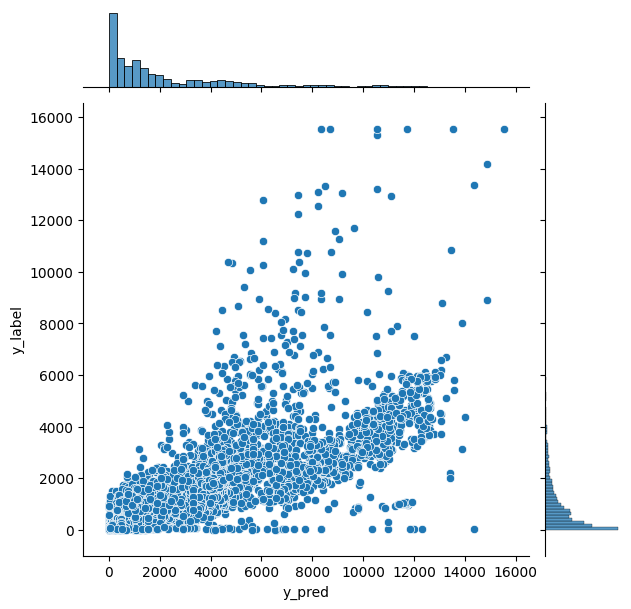

In [14]:
model_DecisionTreeRegressor =joblib.load('models_Q1\DecisionTreeRegressor.joblib') 


y_pred = model_DecisionTreeRegressor.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['DecisionTreeRegressor'] = rmse
r2_results['DecisionTreeRegressor'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### KNN

RMSE: 870.0369771944462
R^2: 0.6428589540377648


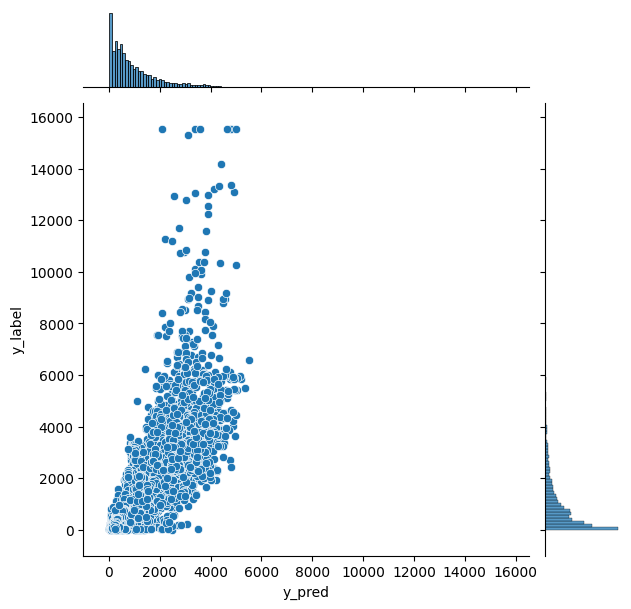

In [15]:
model_KNN = joblib.load('models_Q1\KNN.joblib')


y_pred = model_KNN.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['KNN'] = rmse
r2_results['KNN'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### SVR

RMSE: 1059.6798860811707
R^2: 0.4701978375765735


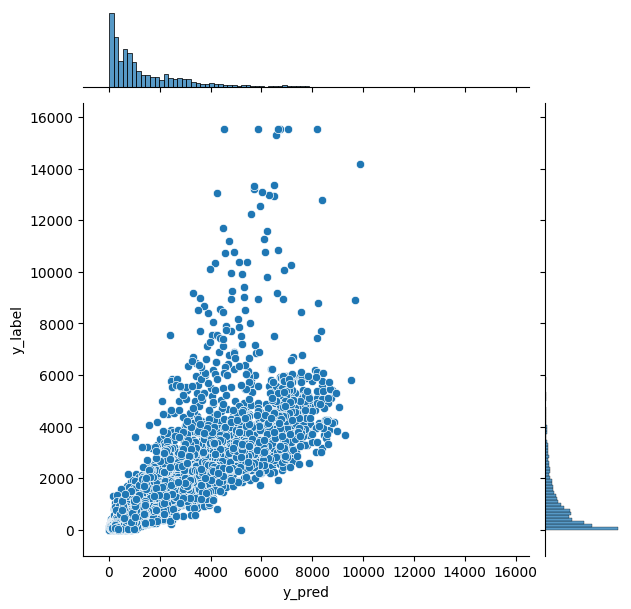

In [16]:
model_SVR = joblib.load('models_Q1\SVR.joblib')


y_pred = model_SVR.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['SVR'] = rmse
r2_results['SVR'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### XGBoost

RMSE: 1326.9907537158267
R^2: 0.16919301714627122


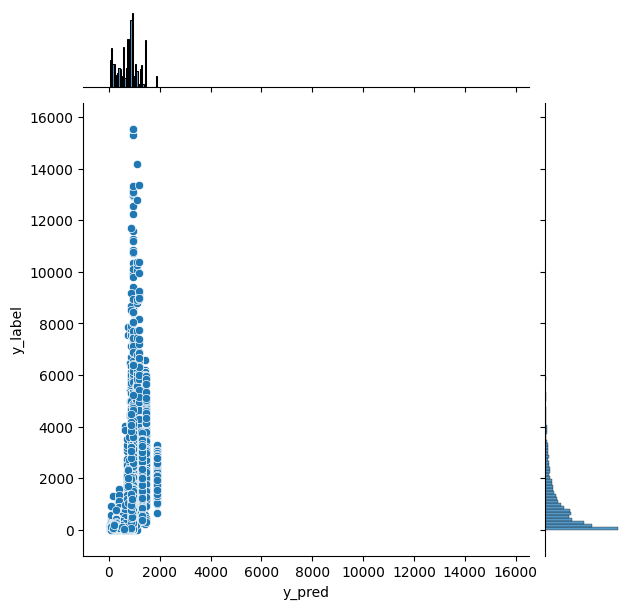

In [17]:
model_XGBoost = joblib.load('models_Q1\XGBoost.joblib')


y_pred = model_XGBoost.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['XGBoost'] = rmse
r2_results['XGBoost'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### LightGBM

RMSE: 1051.2026768513406
R^2: 0.4786405368332386


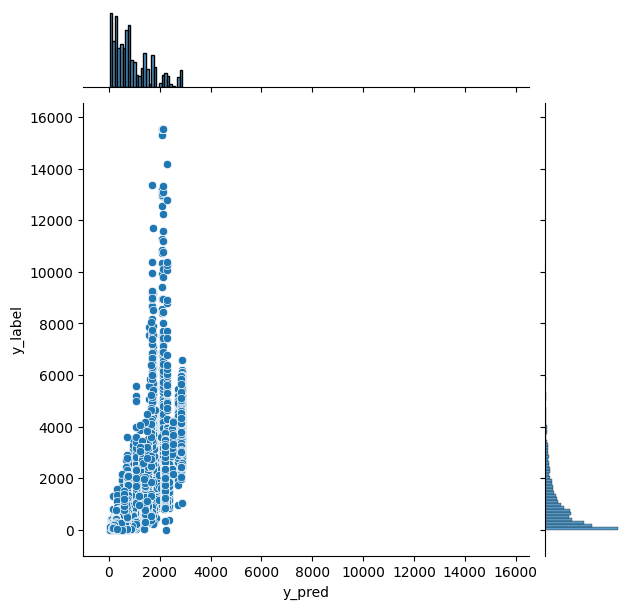

In [18]:
model_LightGBM = joblib.load('models_Q1\LightGBM.joblib')


y_pred = model_LightGBM.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['LightGBM'] = rmse
r2_results['LightGBM'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred, y_test)

### ANN

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
RMSE: 1008.2739951346847
R^2: 0.5203532821316934


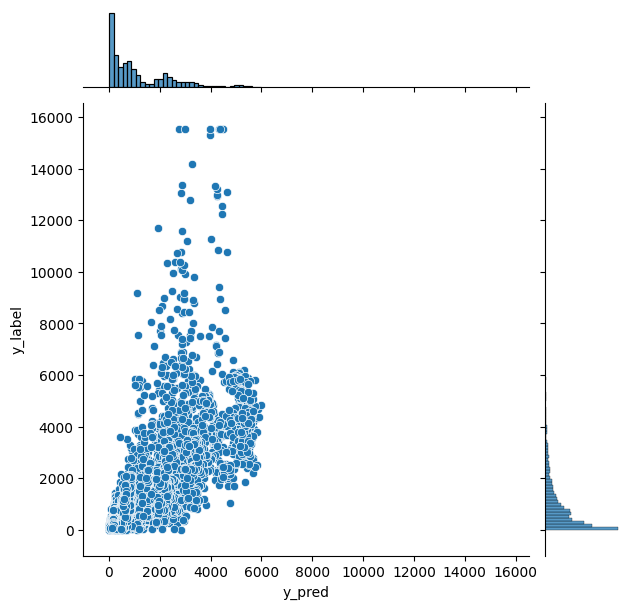

In [19]:
model_ANN = load_model('models_Q1\ANN_model.keras')


y_pred = model_ANN.predict(X_test)
y_pred = np.ceil(np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse_results['ANN'] = rmse
r2_results['ANN'] = r2

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

sns_jointplot(y_pred.reshape(y_test.shape[0]), y_test)

## Compare Models

In [20]:
results_df = pd.DataFrame({
    'RMSE': rmse_results,
    'R2': r2_results
})

In [21]:
results_df.to_csv('data/Q1/results.csv', index=False)

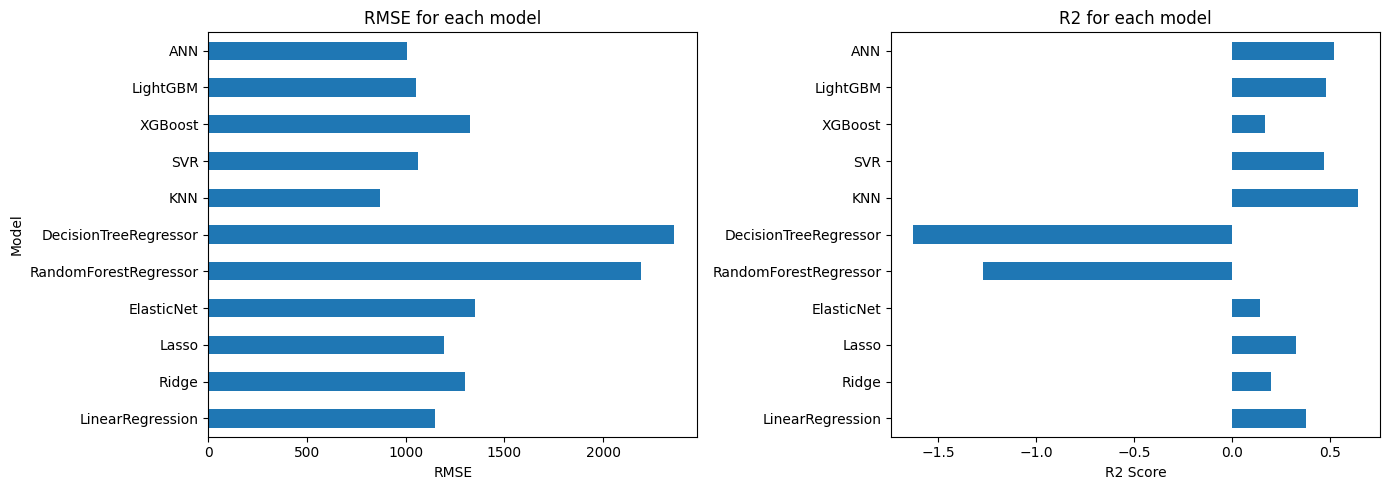

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  

results_df['RMSE'].plot(kind='barh', ax=axes[0])
axes[0].set_title('RMSE for each model')
axes[0].set_xlabel('RMSE')
axes[0].set_ylabel('Model')


results_df['R2'].plot(kind='barh', ax=axes[1])
axes[1].set_title('R2 for each model')
axes[1].set_xlabel('R2 Score')



plt.tight_layout()
plt.show()


As can be seen, **KNN**, **ANN**, and **LightGBM** achieved the best results; however, the values of **RMSE** and **R²** indicate that none of these models were acceptable or effective.


For RMSE, the lower the value, the less error the model has.  
For R², the higher the value, the more accurate the model is.